<a href="https://colab.research.google.com/github/EddyGiusepe/Repasso_Python/blob/main/NumPy_and_SciPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>Funções científicas em NumPy e SciPy</h2>

Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro


A seguir, teremos uma breve visão geral do que o [NumPy](https://machinelearningmastery.com/scientific-functions-in-numpy-and-scipy/?utm_source=drip&utm_medium=email&utm_campaign=Massaging+data+using+pandas&utm_content=Massaging+data+using+pandas) e o [SciPy](https://machinelearningmastery.com/scientific-functions-in-numpy-and-scipy/?utm_source=drip&utm_medium=email&utm_campaign=Massaging+data+using+pandas&utm_content=Massaging+data+using+pandas) fornecem e algumas dicas para usá-los.

Depois de terminar este tutorial, você saberá:

* O que ``NumPy`` e ``SciPy`` fornecem para o seu projeto

* Como acelerar rapidamente o código NumPy usando ``numba``.



# NumPy como uma biblioteca de tensores

Enquanto a ``lista`` e a ``tupla`` em ``Python`` são como gerenciamos arrays nativamente, ``NumPy`` nos fornece os recursos de array mais próximos de C ou Java no sentido de que podemos aplicar todos os elementos do mesmo tipo de dados e, no caso de arrays de alta dimensão, em uma forma regular em cada dimensão. Além disso, realizar a mesma operação no array NumPy geralmente é mais rápido do que no Python nativamente porque o código no NumPy é altamente otimizado.


No exemplo a seguir, plotamos uma ``Elipsóide``.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-2, 2, 100)


In [ ]:
x.shape, y.shape

((100,), (100,))

In [ ]:
# convert vector into 2D arrays

xx, yy = np.meshgrid(x,y)


In [ ]:
xx.shape, yy.shape

((100, 100), (100, 100))

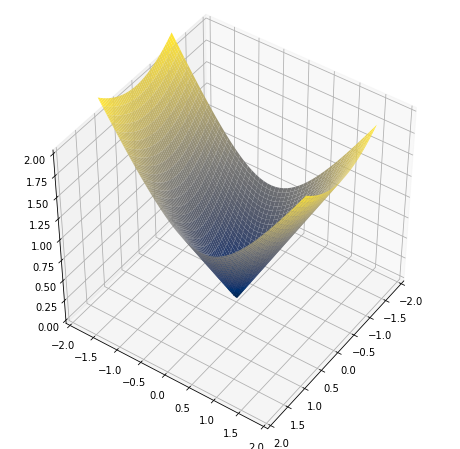

In [ ]:
# computation on matching
z = np.sqrt(xx**2 + yy**2)
 
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([0,2])
ax.plot_surface(xx, yy, z, cmap="cividis")
ax.view_init(45, 35)
plt.show()

## NumPy para expandir a Dimensão

Outro recurso interessante no NumPy é uma função para expandir a dimensão. As ``camadas convolucionais`` na rede neural geralmente esperam <font color="yellow">imagens 3D</font>, ou seja, pixels em 2D e os diferentes canais de cores como terceira dimensão. Funciona para imagens coloridas usando ``canais RGB``, mas temos apenas um canal em imagens em tons de cinza. 


``Por exemplo:`` o conjunto de dados de dígitos no scikit-learn:

In [ ]:
from sklearn.datasets import load_digits


images = load_digits()["images"]
print(images.shape)

(1797, 8, 8)


Isso mostra que existem $1797$ imagens desse conjunto de dados, e cada uma está em $8×8$ ``pixels``. Este é um conjunto de dados em tons de cinza que mostra que cada pixel é um valor de escuridão. Adicionamos o $4º$ eixo a esta matriz (ou seja, ``convertemos uma matriz 3D em uma matriz 4D``) ​​para que cada imagem fique em 8x8x1 pixels:

In [ ]:
# image has axes 0, 1, and 2, adding axis 3

images = np.expand_dims(images, 3)
print(images.shape)

(1797, 8, 8, 1)


Um recurso útil ao trabalhar com o array NumPy é a indexação booleana e a indexação sofisticada. 

``Por exemplo,`` se tivermos um array 2D:

In [ ]:
X = np.array([
    [ 1.299,  0.332,  0.594, -0.047,  0.834],
    [ 0.842,  0.441, -0.705, -1.086, -0.252],
    [ 0.785,  0.478, -0.665, -0.532, -0.673],
    [ 0.062,  1.228, -0.333,  0.867,  0.371]
])

In [ ]:
X.shape

(4, 5)

Podemos verificar se todos os valores em uma coluna são positivos:

In [ ]:
y = (X > 0).all(axis=0)

print(y)

[ True  True False False False]


In [ ]:
y.shape

(5,)

Isso mostra que apenas as duas primeiras colunas são todas positivas. Observe que é uma matriz unidimensional de comprimento $5$, que é do mesmo tamanho que o eixo $1$ da matriz $X$. Se usarmos este array booleano como índice no eixo $1$, selecionamos o subarray apenas para onde o índice é positivo:

In [ ]:
y = X[: , (X > 0).all(axis=0)]

print(y)

[[1.299 0.332]
 [0.842 0.441]
 [0.785 0.478]
 [0.062 1.228]]


In [ ]:
y.shape

(4, 2)

Se uma lista de inteiros for usada no lugar da matriz booleana acima, selecionamos de $X$ acordo com o índice correspondente à lista. O ``NumPy`` chama isso de indexação sofisticada. Então, abaixo, podemos selecionar as duas primeiras colunas duas vezes e formar um novo array:

In [ ]:
y = X[: , [0, 1, 1, 0]]

print(y)

[[1.299 0.332 0.332 1.299]
 [0.842 0.441 0.441 0.842]
 [0.785 0.478 0.478 0.785]
 [0.062 1.228 1.228 0.062]]


# Funções do SciPy

<font color="orange">SciPy</font> é um projeto irmão do NumPy. Portanto, você verá principalmente funções SciPy esperando arrays NumPy como argumentos ou retornando um. O SciPy fornece muito mais funções que são menos usadas ou mais avançadas.


As ``funções do SciPy`` são organizadas em submódulos. Alguns submódulos comuns são:

* ``scipy.cluster.hierarchy:`` Agrupamento hierárquico
* ``scipy.fft:`` Transformação rápida de Fourier
* ``scipy.integrate:`` Integração numérica
* ``scipy.interpolate:`` Funções de interpolação e spline
* ``scipy.linalg:`` Álgebra Linear
* ``scipy.optimize:`` Otimização numérica
* ``scipy.signal:`` Processamento de sinal
* ``scipy.sparse:`` Representação de matriz esparsa
* ``scipy.special:`` Algumas funções matemáticas exóticas
* ``scipy.stats:`` Estatísticas, incluindo distribuições de probabilidade


Mas nunca assuma que o SciPy pode cobrir tudo. Para análise de séries temporais, ``por exemplo``, é melhor depender do módulo ``statsmodels``.

Cobrimos muitos exemplos usando  ``scipy.optimize`` em outros posts. É uma ótima ferramenta para encontrar o mínimo de uma função usando, por exemplo, o método de Newton. Tanto o NumPy quanto o SciPy têm o ``linalg`` submódulo para álgebra linear, mas os do SciPy são mais avançados, como a função para fazer decomposição ``QR`` ou exponenciais de matriz.

Talvez o recurso mais usado do SciPy seja o módulo ``stats``. Tanto no NumPy quanto no SciPy, podemos gerar números aleatórios gaussianos multivariados com correlação diferente de zero.

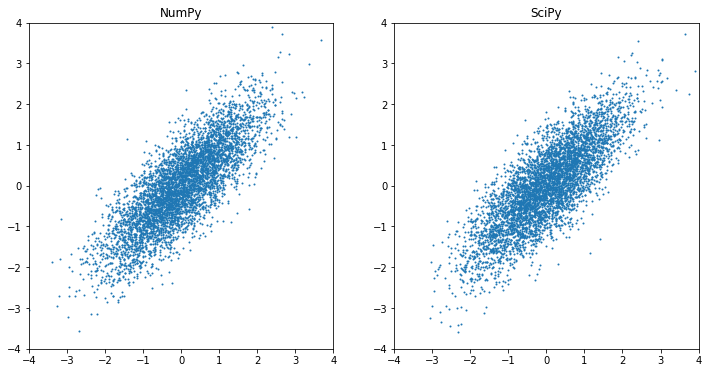

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
 
mean = [0, 0]             # zero mean
cov = [[1, 0.8],[0.8, 1]] # covariance matrix
X1 = np.random.default_rng().multivariate_normal(mean, cov, 5000)
X2 = multivariate_normal.rvs(mean, cov, 5000)
 
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(121)
ax.scatter(X1[:,0], X1[:,1], s=1)
ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.set_title("NumPy")
 
ax = plt.subplot(122)
ax.scatter(X2[:,0], X2[:,1], s=1)
ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.set_title("SciPy")
 
plt.show()